Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

In [1]:
%load_ext cudf.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as  sns
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.12/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.12/dist-packages/cudf/pandas/__init__.py:64: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
c=df.groupby("Outcome").mean()
c

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Glucose'>

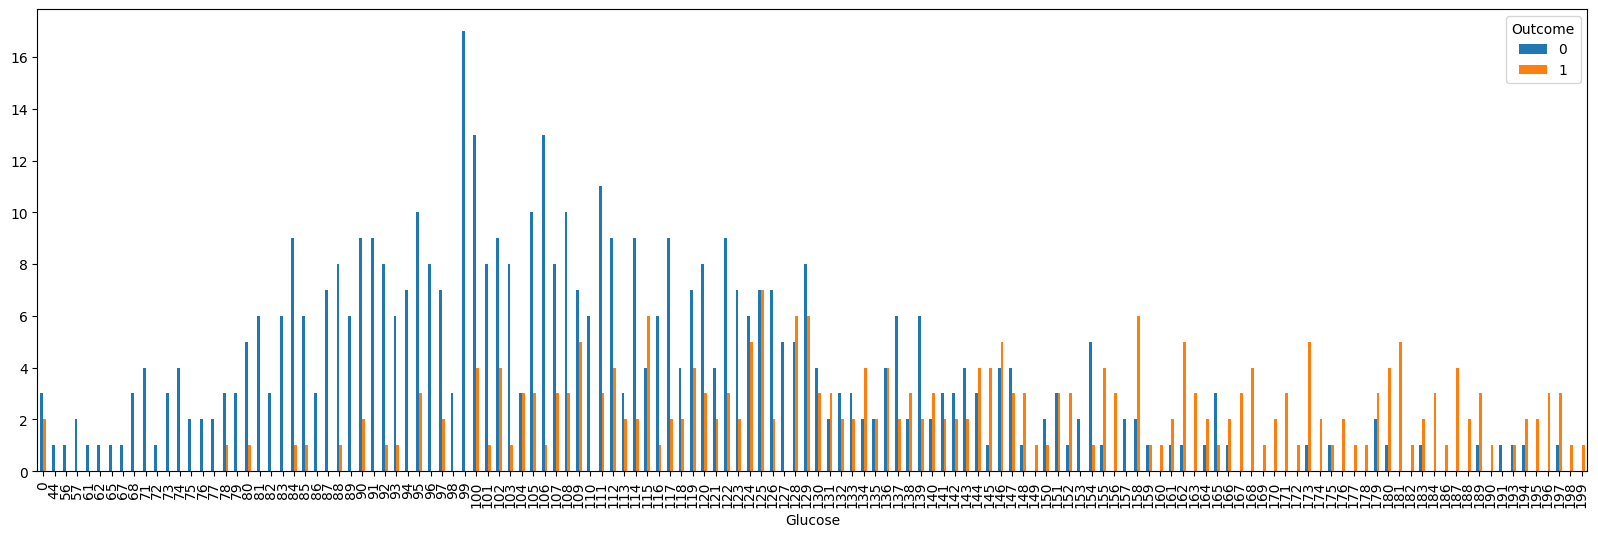

In [4]:
pd.crosstab(df.Glucose,df.Outcome).plot(kind="bar",figsize=(20,6),legend="Outcome")

<Axes: xlabel='BloodPressure'>

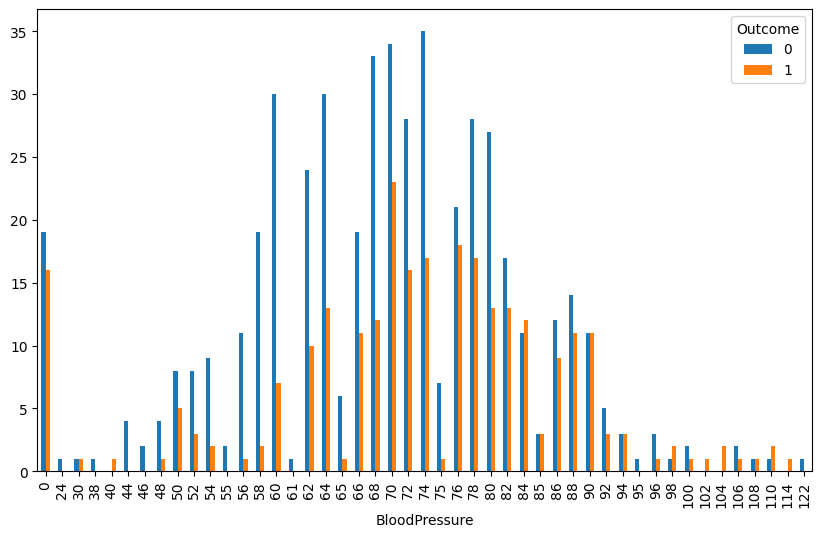

In [5]:
pd.crosstab(df.BloodPressure,df.Outcome).plot(kind="bar",figsize=(10,6))

In [6]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [7]:
df.shape

(768, 9)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.duplicated().sum()

np.int64(0)

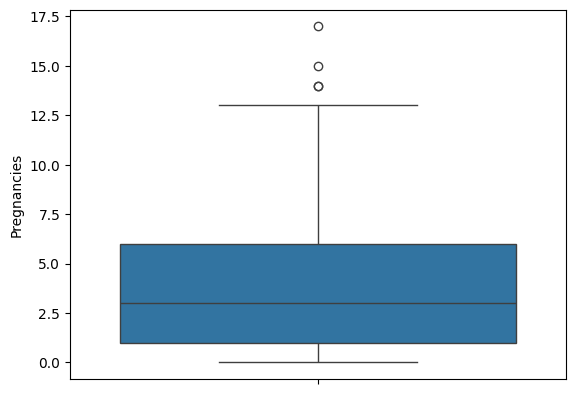

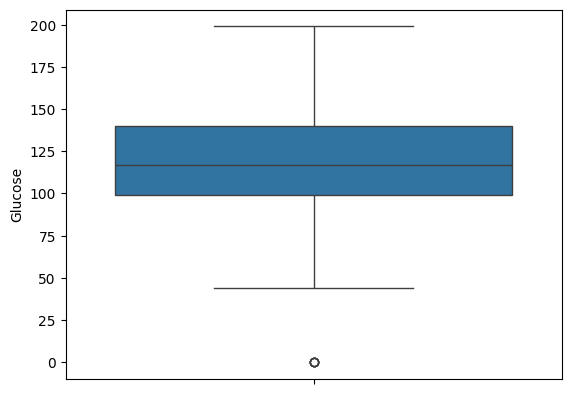

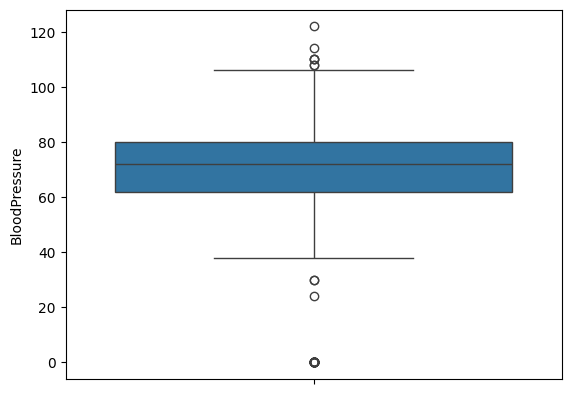

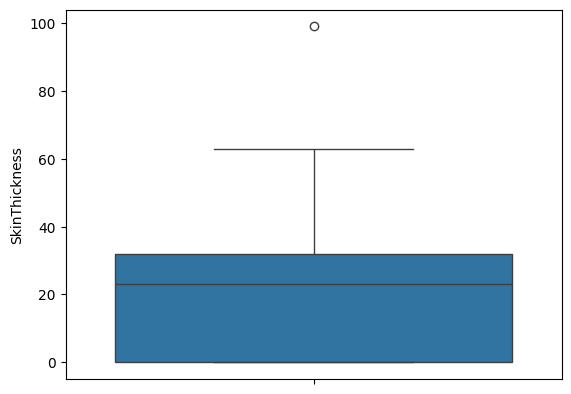

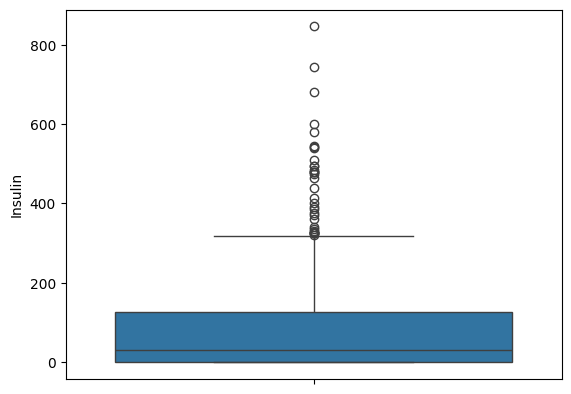

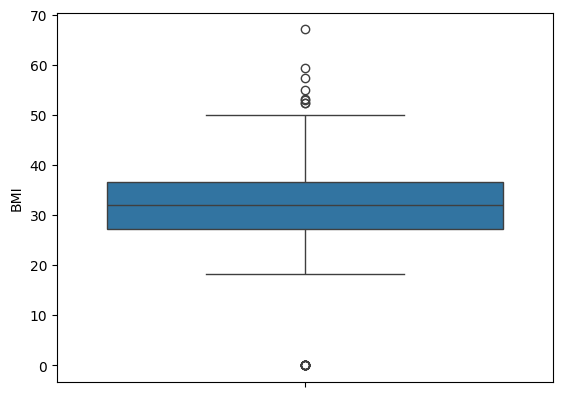

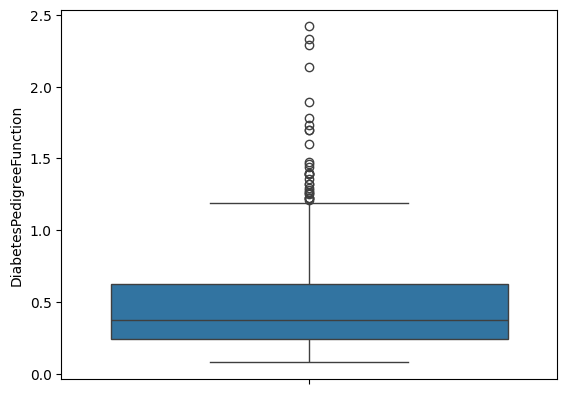

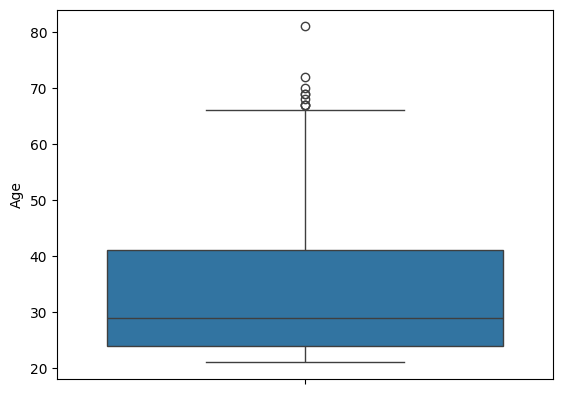

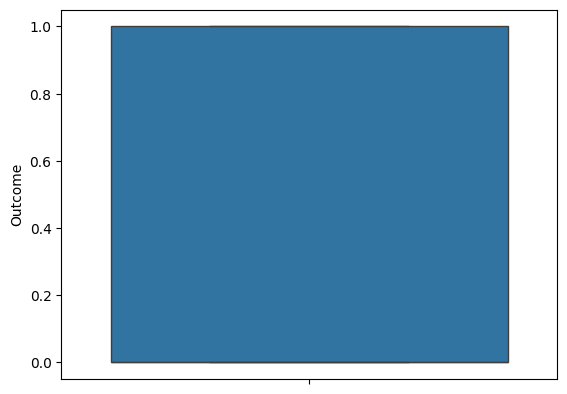

In [12]:
for i in df.columns:
  if  df.dtypes[i]!='object':
    sns.boxplot(df[i])
    plt.show()


In [13]:
for  i in df.columns:
  if df.dtypes[i]!='object':
    print("skewness for ",i," is",df[i].skew())

skewness for  Pregnancies  is 0.9016739791518588
skewness for  Glucose  is 0.17375350179188992
skewness for  BloodPressure  is -1.8436079833551302
skewness for  SkinThickness  is 0.10937249648187608
skewness for  Insulin  is 2.272250858431574
skewness for  BMI  is -0.42898158845356543
skewness for  DiabetesPedigreeFunction  is 1.919911066307204
skewness for  Age  is 1.1295967011444805
skewness for  Outcome  is 0.635016643444986


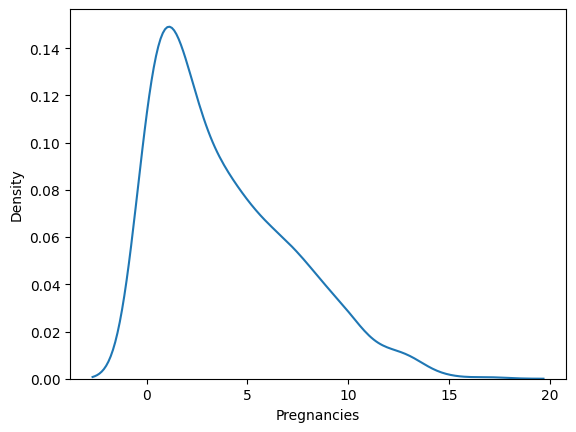

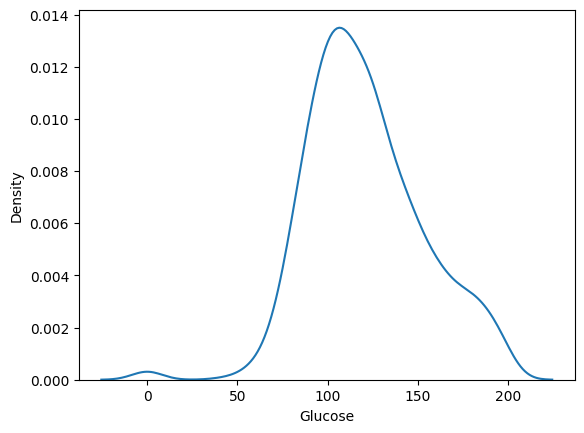

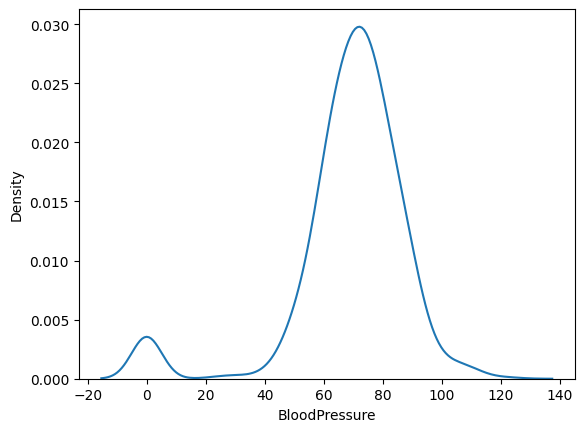

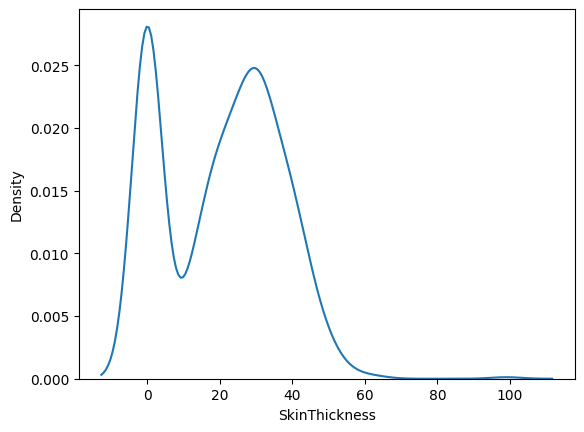

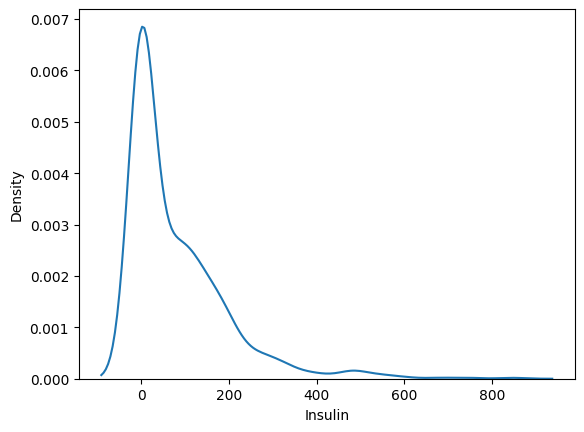

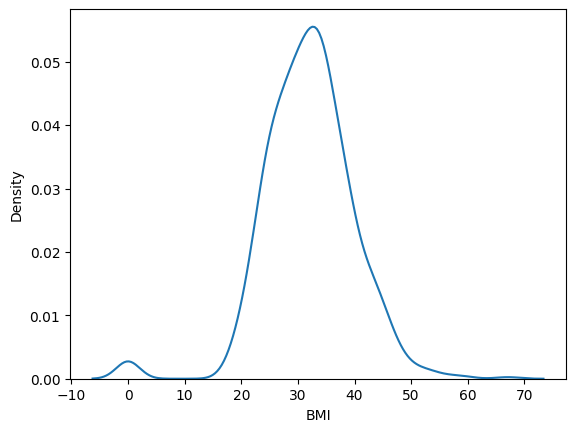

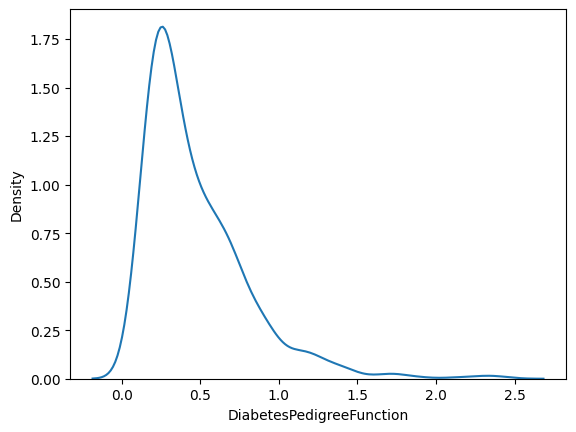

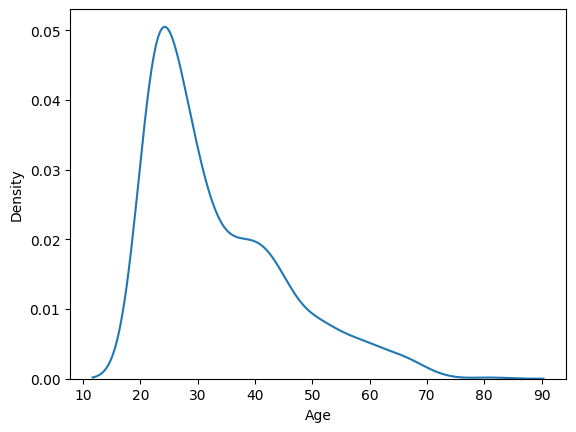

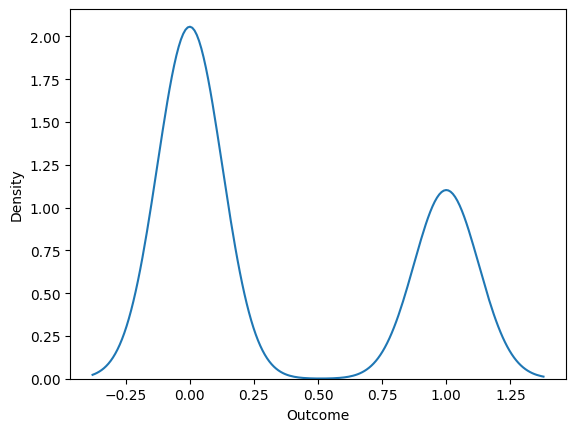

In [14]:
for  i  in df.columns:
  if df[i].dtype!='object':
    sns.kdeplot(df[i])
    plt.show()

In [15]:
symetric=[]
skewed=[]

for  i in df.columns:
  if df.dtypes[i]!='object':
    a=df[i].skew()
    print("skewness for ",i," is",a)
    if a>=0.55 or a<=-0.55:
      symetric.append(i)
    elif (a>=-0.55 and a<=-0.55) or (a>-1 and a<1):
      skewed.append(i)
print(skewed)
print(symetric)


skewness for  Pregnancies  is 0.9016739791518588
skewness for  Glucose  is 0.17375350179188992
skewness for  BloodPressure  is -1.8436079833551302
skewness for  SkinThickness  is 0.10937249648187608
skewness for  Insulin  is 2.272250858431574
skewness for  BMI  is -0.42898158845356543
skewness for  DiabetesPedigreeFunction  is 1.919911066307204
skewness for  Age  is 1.1295967011444805
skewness for  Outcome  is 0.635016643444986
['Glucose', 'SkinThickness', 'BMI']
['Pregnancies', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [16]:


for  i in symetric:
  m=df[i].mean()
  s=df[i].std()
  lb=m-2*s
  ub=m+2*s
  df=df[(df[i]>lb) & (df[i]<ub)]
for j in skewed:
  q1=df[j].quantile(0.25)
  q3=df[j].quantile(0.75)
  iqr=q3-q1
  lb=q1-1.5*iqr
  ub=q3+1.5*iqr
  df=df[(df[j]>lb) & (df[j]<ub)]
print(df.shape)


(556, 9)


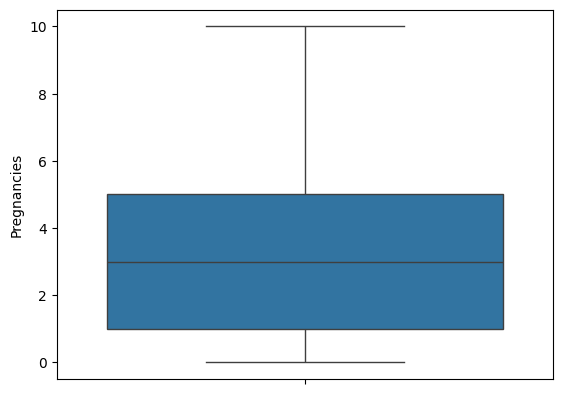

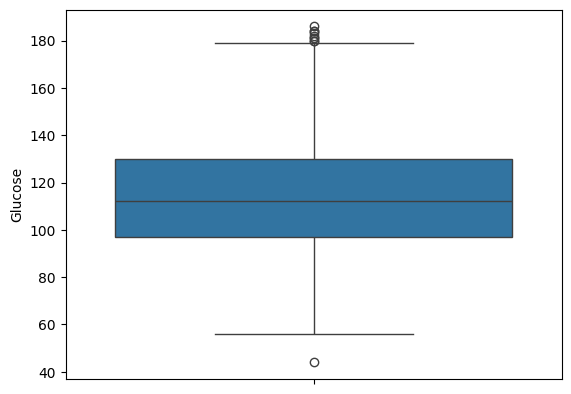

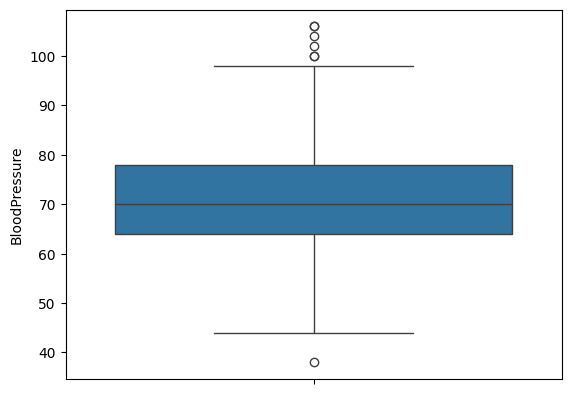

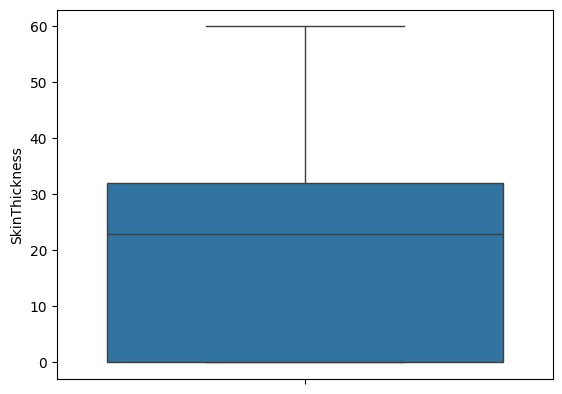

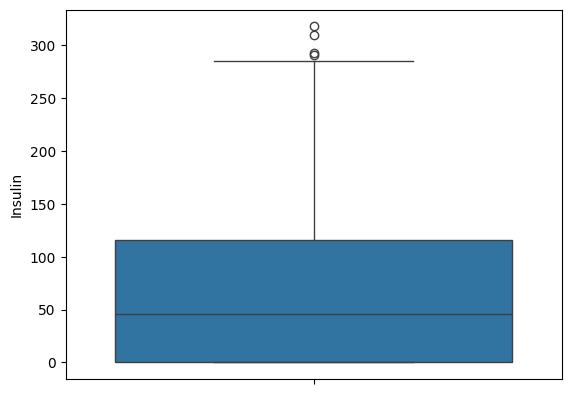

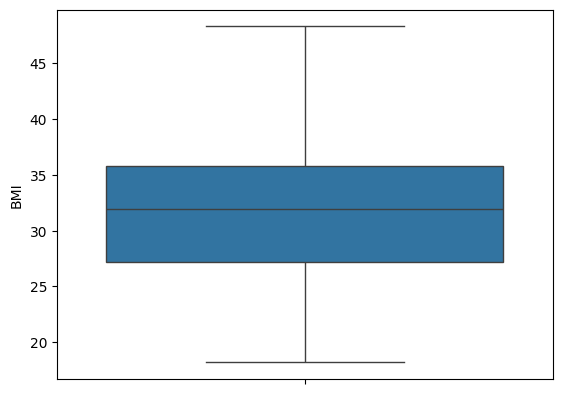

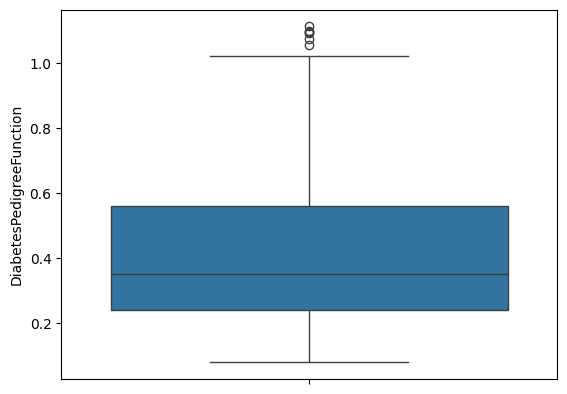

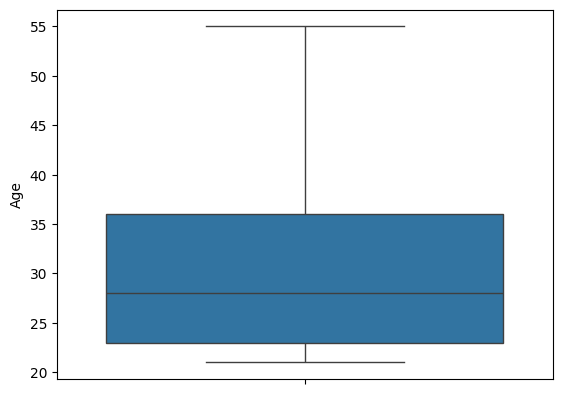

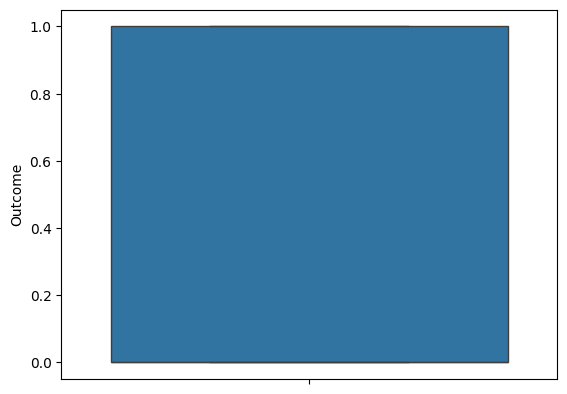

In [17]:
for i in df.columns:
  if  df.dtypes[i]!='object':
    sns.boxplot(df[i])
    plt.show()


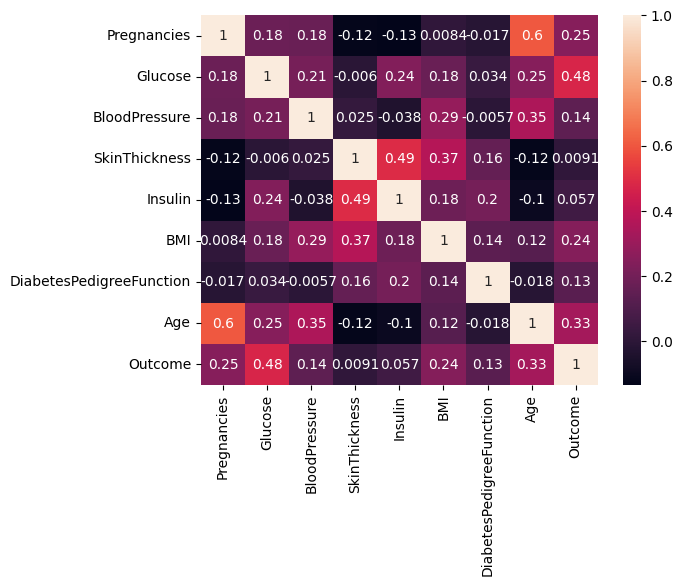

In [18]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [20]:
corr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.179088,0.175310,-0.123458,-0.134181,0.008372,-0.016913,0.602360,0.249589
Glucose,0.179088,1.000000,0.209964,-0.005985,0.241830,0.175272,0.034377,0.249543,0.476017
BloodPressure,0.175310,0.209964,1.000000,0.024810,-0.038209,0.290262,-0.005694,0.350884,0.141205
SkinThickness,-0.123458,-0.005985,0.024810,1.000000,0.491235,0.372148,0.161321,-0.121734,0.009090
Insulin,-0.134181,0.241830,-0.038209,0.491235,1.000000,0.182324,0.203758,-0.100214,0.057472


In [21]:
print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.476017
Age                         0.327439
Pregnancies                 0.249589
BMI                         0.242749
BloodPressure               0.141205
DiabetesPedigreeFunction    0.127842
Insulin                     0.057472
SkinThickness               0.009090
Name: Outcome, dtype: float64


as insulin and skinthinklesss are very less related to the outcome so we will later remoove them with the help of pca


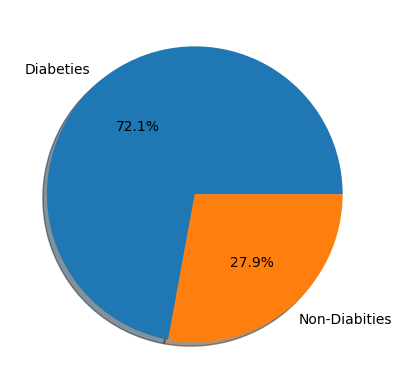

In [22]:
plt.pie(df['Outcome'].value_counts(),labels=["Diabeties","Non-Diabities"],shadow=True,autopct='%.1f%%')
plt.show()

autopct='%.f%%'

%.f → show the value as a floating-point number with no decimal places.

%% → adds a literal % symbol.

Example: 78%, 22%.

autopct='%.1f%%'

.1f → one decimal place.

Example: 77.8%, 22.2%.

autopct='%d%%'

Show as an integer.

Example: 78%, 22%.

In [23]:
df['Outcome'].value_counts()

,count
Outcome,
0,401
1,155


In [24]:
#sepration of target and features
X=df.drop(columns=['Outcome'])
Y=df['Outcome']

In [25]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=6)
#X=pca.fit_transform(X)
#i try pca but it reduces the acuracy

In [26]:
#apply data formating as we will apply linear regresson so we willmove with the standardization(mean=0.std=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [27]:
df1=df.copy()

In [28]:
#apply data formating as we will apply linear regresson so we willmove with the standardization(mean=0.std=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,random_state=1)

In [30]:
model=LogisticRegression(max_iter=100000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=100000)

Acuracy is  0.802158273381295
f1 score is  0.6099290780141844
precision score is  0.6615384615384615
recall score is  0.5657894736842105

In [31]:
p=model.predict(X_test)
acc=accuracy_score(Y_test,p)
f1=f1_score(Y_test,p)
p1=precision_score(Y_test,p)
r1=recall_score(Y_test,p)
print("Acuracy is ",acc)
print("f1 score is ",f1)
print("precision score is ",p1)
print("recall score is ",r1)

Acuracy is  0.8057553956834532
f1 score is  0.6086956521739131
precision score is  0.6774193548387096
recall score is  0.5526315789473685


In [32]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [33]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,random_state=1)

In [34]:
acc=[]
f1=[]
X=pd.DataFrame(X)
#Y=pd.DataFrame(Y)
for train,test in kf.split(X,Y):
  X_train,X_test,Y_train,Y_test=X.iloc[train],X.iloc[test],Y.iloc[train],Y.iloc[test]
  model=LogisticRegression(max_iter=100000)
  model.fit(X_train,Y_train)
  p=model.predict(X_test)
  acc.append(accuracy_score(Y_test,p))

In [35]:
print(np.mean(acc)) # without scalling got 78.59


0.7930844155844156


In [36]:
acc=accuracy_score(Y_test,p)
print(acc)
#the accuracy without scalling is 79.8% at 0.9 train size
#the accuraacy with scalling is 80.5% at 0.5 train size

0.8


In [37]:
f1=f1_score(Y_test,p)
print(f1)

0.47619047619047616


In [38]:
p1=precision_score(Y_test,p)
print(p1)
r1=recall_score(Y_test,p)
print(r1)

0.7142857142857143
0.35714285714285715


In [39]:
r1=recall_score(Y_test,p)
print(r1)

0.35714285714285715


now we will going to impliment ROC(Reciver operating characterstics) which will tell us how good our model is and tell is that simply guessing or not

In [44]:
from sklearn.metrics import roc_curve,roc_auc_score,auc


In [42]:
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [45]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


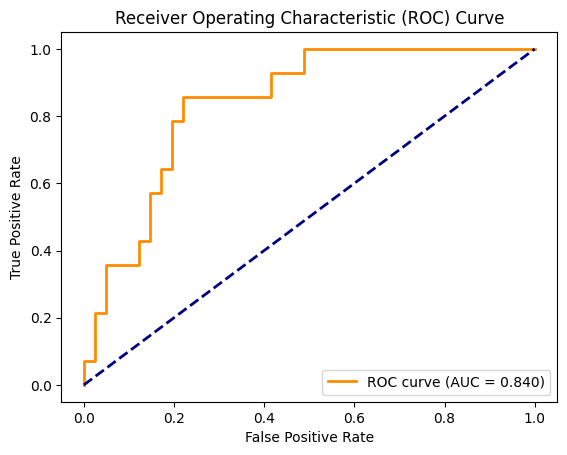

In [51]:
#plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
roc_auc_score(Y_test, y_pred_proba)


np.float64(0.8397212543554007)

ValueError: y should be a 1d array, got an array of shape (55, 2) instead.

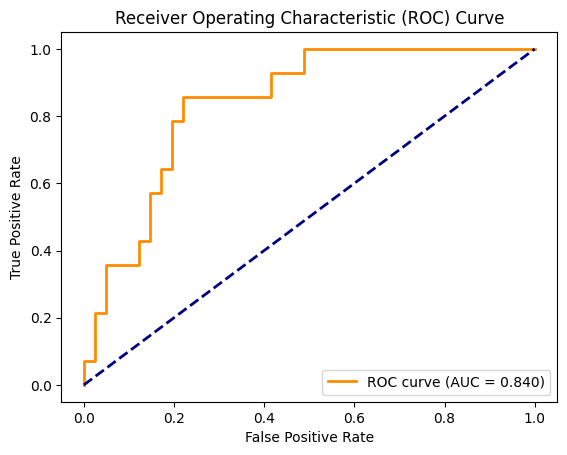

In [55]:
import joblib

# Suppose your trained model is named 'model'
joblib.dump(model, "diabetes_model.pkl")


['diabetes_model.pkl']

In [56]:
import joblib
import numpy as np

# Load saved model
model = joblib.load("diabetes_model.pkl")

# Example user input: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
user_data = np.array([[2, 120, 70, 20, 85, 25.3, 0.351, 31]])

# Make prediction
prediction = model.predict(user_data)

if prediction[0] == 1:
    print("🩸 The model predicts that the person is likely to have diabetes.")
else:
    print("✅ The model predicts that the person is not likely to have diabetes.")


🩸 The model predicts that the person is likely to have diabetes.


In [57]:
pip freeze > requirements.txt
